### Analysis software development v2 

Goal: establish smooth reading of the binary DAQ datafiles

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
from scipy.stats import norm


# import data handling class
from DT5550 import *


Open a datafile and read the data

In [50]:
#
# open the datfile / data directory
#
    
#
# loop over all the events
#
dt_max = 10

Etot = []
ee = []
tt = []
pp = []
for i in range(8):
    pp.append([])
tdif = []

nmax = 9999


io = DT5550(indir='C:/data/20220216_125953/')

nf = 0

dtime = []
for file in io.filenames:
    io.open_data(file)
    nf = nf + 1
    if nf>nmax:
        break
    while io.read_event() == 0: 
        # data: io.Q[0:ndet-1] -> energy
        #       io.ph[0:ndet-1] -> peak height
        #       io.t[0:ndet-1] -> time without timewalk correction
        #       io.tc[0:ndet-1] -> time with timewalk correction
        #       io.valid[0:ndet-1] -> valid bit = 1 for valid data
        #       io.R[0:ndet-1] -> peak/area ratio
        nh = io.valid.sum()
        
        Etot.append(io.Q.sum())
        
        #
        # select events where the total energy of a Na22 decay is observed
        #
        if (nh>2) and (io.Q.sum()>2150) and (io.Q.sum()<2400):
            for idet in range(N_DETECTOR):
                # 1274 gamma ray from Ne22
                if abs(io.Q[idet]-1274)<75:
                    #print('1274keV ', idet,'t =',io.tc[idet],'E =',io.Q[idet])
                    t0 = io.tc[idet]
         
            nn = 0
            esum = 0
            tsum = []
            for idet in range(N_DETECTOR):
                # energy below 2*m_e
                if (io.valid[idet]) and (abs(io.Q[idet])<1022):
                    nn = nn + 1
                    esum = esum + io.Q[idet]
                    tsum.append(io.tc[idet]-t0)
                    
                    #print('gg     ', idet,'t =',io.tc[idet]-t0,'E =',io.Q[idet])
            tsum = np.array(tsum)
            if nn==3:
                #print('nn',nn,'esum =',esum, 'tav =',tsum/nn)
                if abs(esum-1022)<100:
                    ss = np.sqrt(tsum.var())
                    if ss<10:
                        tt.append(tsum.mean())
                    
print('Processing done')

Etot = np.array(Etot,dtype=object)
ee = np.array(ee,dtype=object)


#r = np.array(r, dtype=object)

DT5550:: Data recorded with config:  C:/data/20220216_125953\config_20220216_125953.json
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_0.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_1.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_2.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_3.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_4.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_5.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_6.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_7.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_8.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_9.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_10.raw
DT5550:: Open data file: C:/data/20220216_125953\data_20220216_125953_11.r

#### Define fit functions

200000


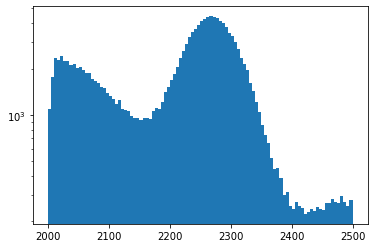

In [41]:
h = plt.hist(Etot,bins=100,range=(2000,2500))
plt.yscale('log')


print(len(Etot))

C:\Users\admlab\AppData\Local\Temp/ipykernel_9484/1933385541.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


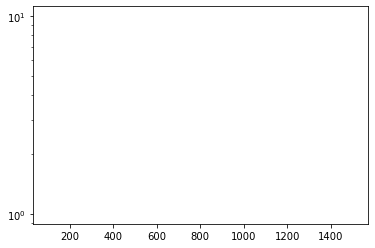

In [42]:
h = plt.hist(ee,bins=100,range=(100,1500))
plt.yscale('log')

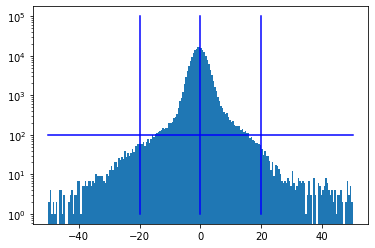

In [64]:
tt=np.array(tt)
h = plt.hist(tt,bins=200,range=(-50,50))
plt.yscale('log')
plt.plot([-50, 50],[100,100],'b')
plt.plot([-20,-20],[1,1e5],'b')
plt.plot([ 20, 20],[1,1e5],'b')

plt.plot([-0,-0],[1,1e5],'b')